Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use('seaborn')

Baixando dados

In [3]:
def busca_dados(codigo_serie, dataInicial, dataFinal):

    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}'

    dados = pd.read_json(url)
    dados.data = pd.to_datetime(dados.data, dayfirst=True)
    dados.set_index('data', inplace=True)
    
    return dados

SELIC meta definida pelo COPOM


In [4]:
selic_meta = busca_dados('432', '01/02/2017', '31/12/2021')
selic_meta.tail()

,valor
data,
2021-12-04,7.75
2021-12-05,7.75
2021-12-06,7.75
2021-12-07,7.75
2021-12-08,7.75


In [5]:
selic_meta_n = selic_meta / selic_meta.iloc[0]
selic_meta_n.tail()

,valor
data,
2021-12-04,0.596154
2021-12-05,0.596154
2021-12-06,0.596154
2021-12-07,0.596154
2021-12-08,0.596154


IPCA definada pelo IBGE

In [6]:
ipca = busca_dados('13522', '01/02/2017', '31/12/2021')
ipca.head()

,valor
data,
2017-02-01,4.76
2017-03-01,4.57
2017-04-01,4.08
2017-05-01,3.60
2017-06-01,3.00


Normalizando a base

In [7]:
ipca.iloc[0]

valor    4.76
Name: 2017-02-01 00:00:00, dtype: float64

In [8]:
ipca_n = ipca / ipca.iloc[0]
ipca_n.head()

,valor
data,
2017-02-01,1.000000
2017-03-01,0.960084
2017-04-01,0.857143
2017-05-01,0.756303
2017-06-01,0.630252


Meta para a inflação

In [9]:
meta_ipca = busca_dados('13521', '01/02/2017', '01/01/2023')
meta_ipca.tail()

,valor
data,
2019-01-01,4.25
2020-01-01,4.00
2021-01-01,3.75
2022-01-01,3.50
2023-01-01,3.25


In [10]:
intervalo_cima = meta_ipca.apply(lambda x: meta_ipca.valor + 1.5, axis=0)
intervalo_cima

,valor
data,
2017-01-01,6.00
2018-01-01,6.00
2019-01-01,5.75
2020-01-01,5.50
2021-01-01,5.25
2022-01-01,5.00
2023-01-01,4.75


In [11]:
intervalo_baixo = meta_ipca.apply(lambda x: meta_ipca.valor - 1.5, axis=0)
intervalo_baixo

,valor
data,
2017-01-01,3.00
2018-01-01,3.00
2019-01-01,2.75
2020-01-01,2.50
2021-01-01,2.25
2022-01-01,2.00
2023-01-01,1.75


Gráfico

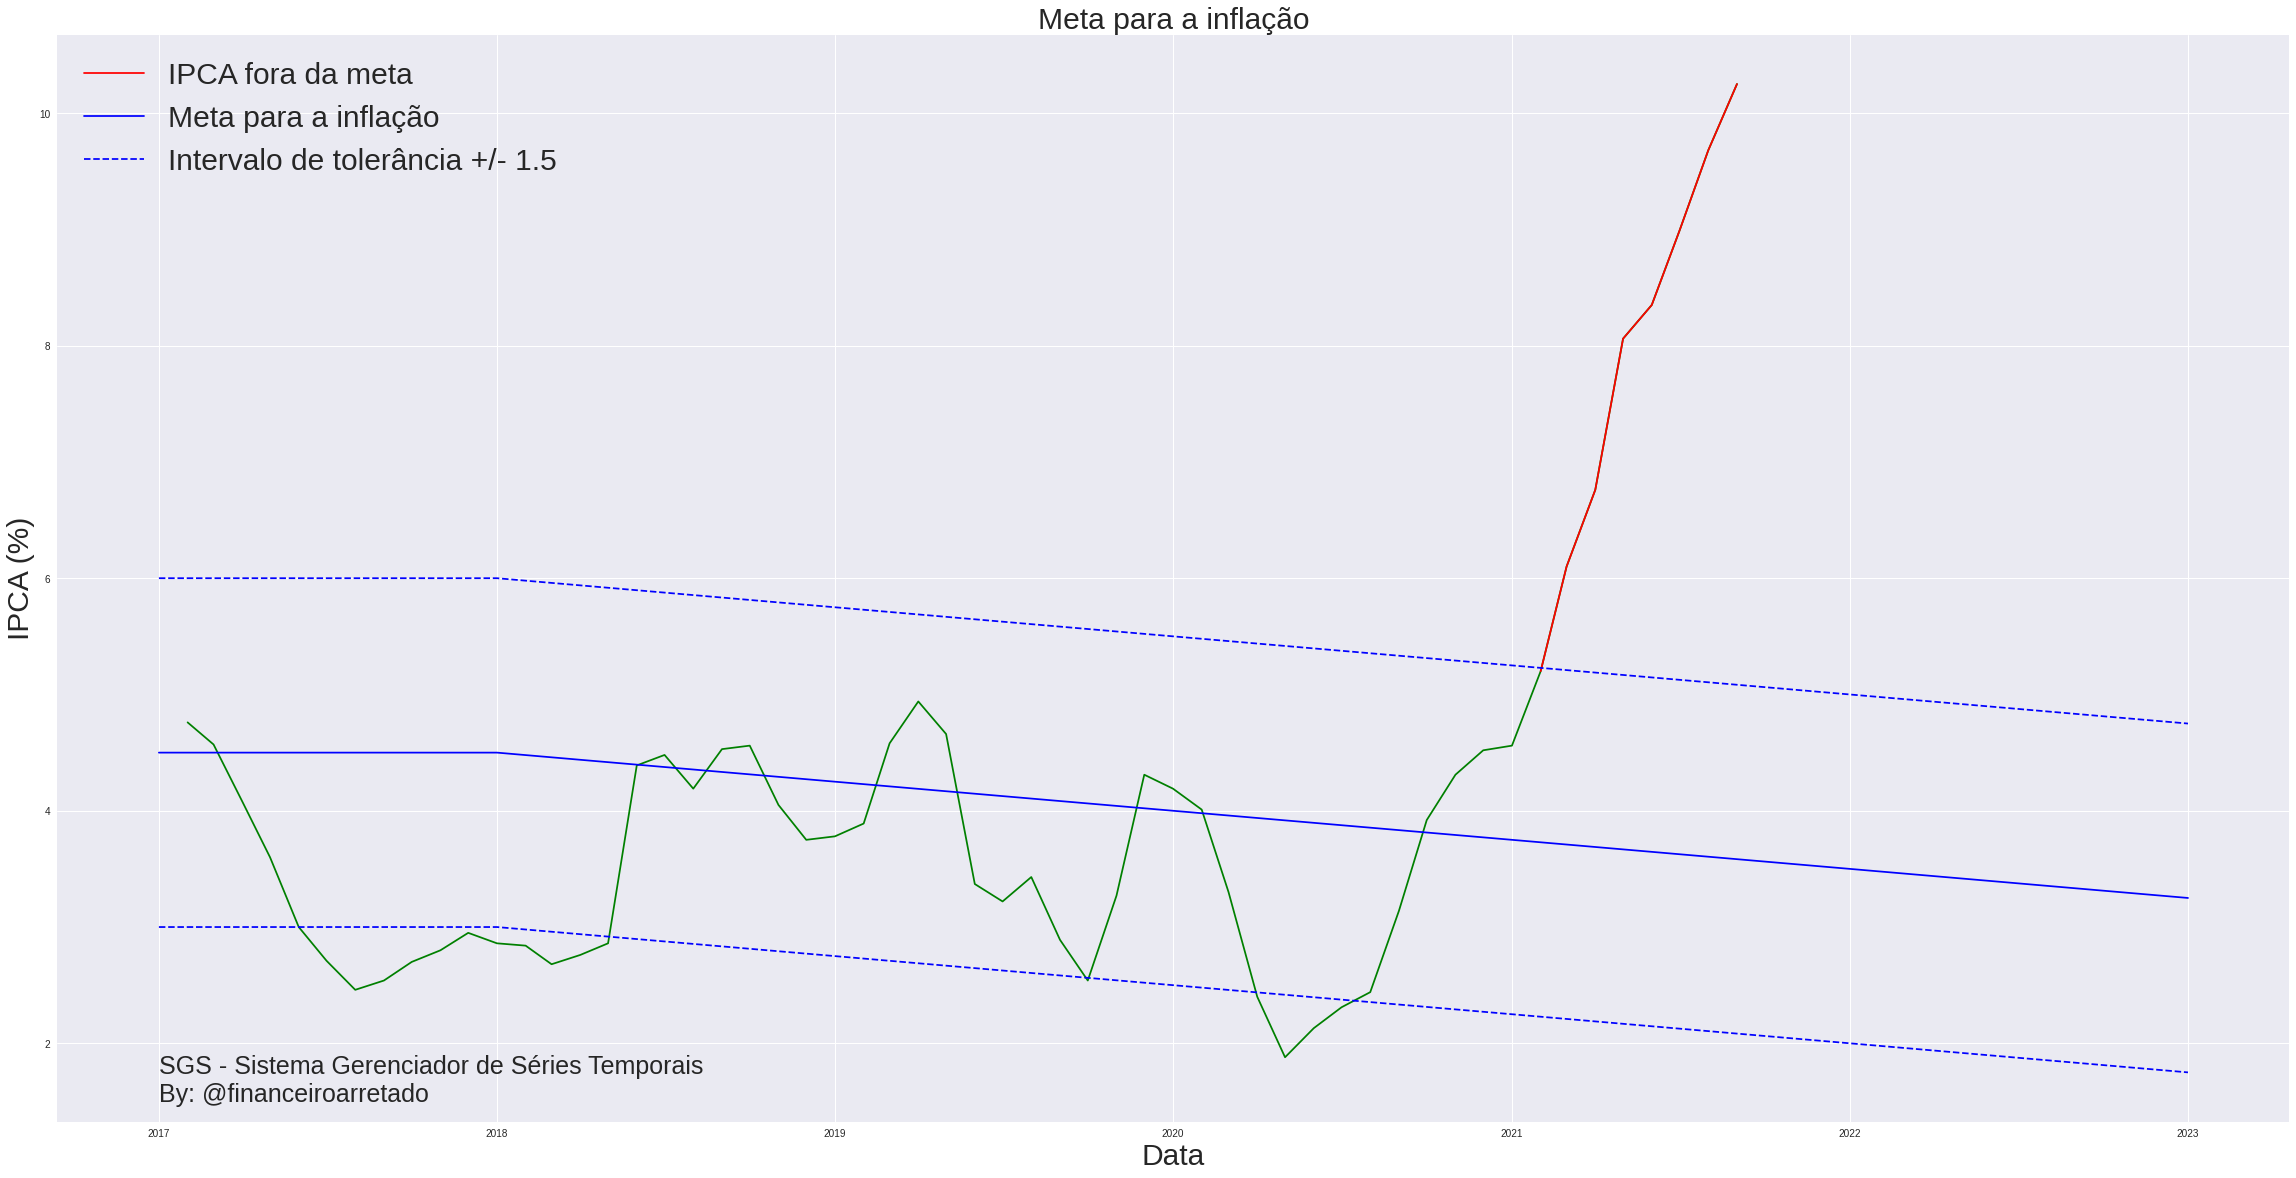

In [17]:
plt.figure(figsize=(40, 20));
plt.title('Meta para a inflação', fontsize=30);
plt.xlabel('Data', fontsize=30);
plt.ylabel('IPCA (%)', fontsize=30);
#x, = plt.plot(selic_meta, color='black');
y1, = plt.plot(ipca, color='green');
y2, = plt.plot(ipca[(ipca.index.year >= 2021) & (ipca.index.month >= 2)], color='red', label='Line1');
#y3, = plt.plot(ipca[(ipca.index >= 2017-3-1) & (ipca.index <= 2017-3-1)], color='red');
a, = plt.plot(meta_ipca, color='blue', label='Line2');
b, = plt.plot(intervalo_baixo, 'b--', label='Line3');
c, = plt.plot(intervalo_cima, 'b--');
plt.text(pd.DatetimeIndex(['2017-01-01']), 1.5, 'SGS - Sistema Gerenciador de Séries Temporais\nBy: @financeiroarretado', fontsize=25);
plt.legend([y2, a, b], ['IPCA fora da meta', 'Meta para a inflação', 'Intervalo de tolerância +/- 1.5'], loc=2, fontsize=30);


Gráfico normalizado

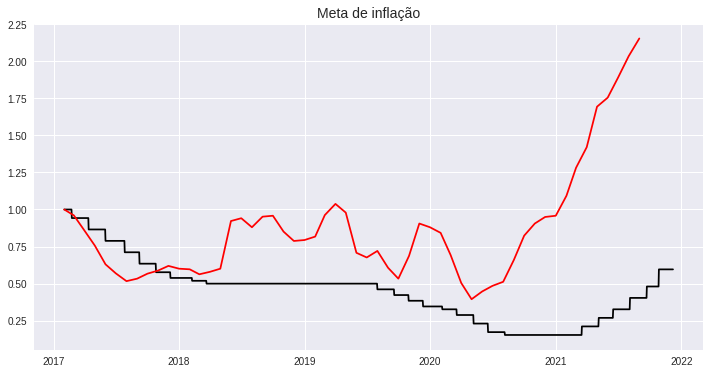

In [13]:
plt.figure(figsize=(12, 6));
plt.title('Meta de inflação', fontsize=14);
x, = plt.plot(selic_meta_n, color='black');
y, = plt.plot(ipca_n, color='red');